In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
from dateutil.relativedelta import relativedelta
import pandas as pd
import xgcm

%matplotlib inline

In [2]:
try:
    ds_RG_argo = xr.open_mfdataset('/Volumes/Lagarostrobos/datasets/observations/Argo/roemmich-gilson_climatology/RG_ArgoClim_[0-9]*',
                               decode_times=False, combine='by_coords')

except OSError:
    ds_RG_argo = xr.open_mfdataset("/Users/ewd/Library/CloudStorage/OneDrive-UniversityofTasmania/Ed's Files/Research/datasets/RG_argo/RG_ArgoClim_[0-9]*",
                               decode_times=False, combine='by_coords')
    

In [3]:
ds_RG_argo_2016 = xr.open_mfdataset("/Users/ewd/Library/CloudStorage/OneDrive-UniversityofTasmania/Ed's Files/Research/datasets/RG_argo/RG_ArgoClim_Temp.nc",
                               decode_times=False, combine='by_coords')

In [4]:
ds_RG_argo = xr.merge([ds_RG_argo_2016, ds_RG_argo])

/Users/ewd/anaconda3/envs/py311/lib/python3.11/site-packages/xarray/core/indexing.py:1390: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]
/Users/ewd/anaconda3/envs/py311/lib/python3.11/site-packages/xarray/core/indexing.py:1384: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  r

In [5]:
ds_RG_argo = ds_RG_argo.chunk('auto')

In [6]:
ds_RG_argo

<xarray.Dataset>
Dimensions:                   (LONGITUDE: 360, LATITUDE: 145, PRESSURE: 58,
                               TIME: 233)
Coordinates:
  * LONGITUDE                 (LONGITUDE) float32 20.5 21.5 22.5 ... 378.5 379.5
  * LATITUDE                  (LATITUDE) float32 -64.5 -63.5 -62.5 ... 78.5 79.5
  * PRESSURE                  (PRESSURE) float32 2.5 10.0 ... 1.9e+03 1.975e+03
  * TIME                      (TIME) float32 0.5 1.5 2.5 ... 230.5 231.5 232.5
Data variables:
    ARGO_TEMPERATURE_MEAN     (PRESSURE, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(58, 145, 360), meta=np.ndarray>
    ARGO_TEMPERATURE_ANOMALY  (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(11, 58, 145, 360), meta=np.ndarray>
    BATHYMETRY_MASK           (PRESSURE, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(58, 145, 360), meta=np.ndarray>
    ARGO_SALINITY_ANOMALY     (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(11, 58, 145, 360), meta=np.ndarray>
Attributes:
    history:  FERRET V5.51    9-Jun-15FERRET V5.51   28-Aug-15FERRET V5.51   ...

In [7]:
# create a better datetime index for climatology computations
datetime_index = []

for i in range(ds_RG_argo['TIME'].shape[0]):
    datetime_index.append(date(2004, 1, 15) + relativedelta(months=np.floor(ds_RG_argo['TIME'][i])))
    
ds_RG_argo = ds_RG_argo.assign_coords({'TIME':pd.to_datetime(datetime_index)})

In [8]:
ds_RG_argo

<xarray.Dataset>
Dimensions:                   (LONGITUDE: 360, LATITUDE: 145, PRESSURE: 58,
                               TIME: 233)
Coordinates:
  * LONGITUDE                 (LONGITUDE) float32 20.5 21.5 22.5 ... 378.5 379.5
  * LATITUDE                  (LATITUDE) float32 -64.5 -63.5 -62.5 ... 78.5 79.5
  * PRESSURE                  (PRESSURE) float32 2.5 10.0 ... 1.9e+03 1.975e+03
  * TIME                      (TIME) datetime64[ns] 2004-01-15 ... 2023-05-15
Data variables:
    ARGO_TEMPERATURE_MEAN     (PRESSURE, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(58, 145, 360), meta=np.ndarray>
    ARGO_TEMPERATURE_ANOMALY  (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(11, 58, 145, 360), meta=np.ndarray>
    BATHYMETRY_MASK           (PRESSURE, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(58, 145, 360), meta=np.ndarray>
    ARGO_SALINITY_ANOMALY     (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(11, 58, 145, 360), meta=np.ndarray>
Attributes:
    history:  FERRET V5.51    9-Jun-15FERRET V5.51   28-Aug-15FERRET V5.51   ...

In [9]:
ds_RG_argo_monthly_clim = ds_RG_argo.sel(TIME=slice('2004-01-01','2022-12-31')).groupby("TIME.month").mean(dim='TIME')


In [10]:
ds_RG_argo_anom = ds_RG_argo.groupby("TIME.month") - ds_RG_argo_monthly_clim

/Users/ewd/anaconda3/envs/py311/lib/python3.11/site-packages/xarray/core/indexing.py:1384: PerformanceWarning: Slicing with an out-of-order index is generating 20 times more chunks
  return self.array[key]


In [11]:
ds_RG_argo_anom

<xarray.Dataset>
Dimensions:                   (LONGITUDE: 360, LATITUDE: 145, PRESSURE: 58,
                               TIME: 233)
Coordinates:
  * LONGITUDE                 (LONGITUDE) float32 20.5 21.5 22.5 ... 378.5 379.5
  * LATITUDE                  (LATITUDE) float32 -64.5 -63.5 -62.5 ... 78.5 79.5
  * PRESSURE                  (PRESSURE) float32 2.5 10.0 ... 1.9e+03 1.975e+03
  * TIME                      (TIME) datetime64[ns] 2004-01-15 ... 2023-05-15
    month                     (TIME) int64 1 2 3 4 5 6 7 8 ... 11 12 1 2 3 4 5
Data variables:
    ARGO_TEMPERATURE_MEAN     (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(1, 58, 145, 360), meta=np.ndarray>
    ARGO_TEMPERATURE_ANOMALY  (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(1, 58, 145, 360), meta=np.ndarray>
    BATHYMETRY_MASK           (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(1, 58, 145, 360), meta=np.ndarray>
    ARGO_SALINITY_ANOMALY     (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(1, 58, 145, 360), meta=np.ndarray>

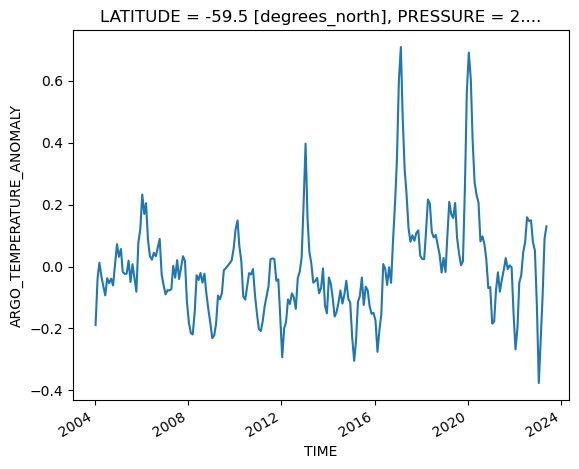

In [12]:
# sanity check - plot temperature anomaly time series at a specific location.
ds_RG_argo_anom['ARGO_TEMPERATURE_ANOMALY'].sel(LATITUDE=-60, method='nearest').sel(PRESSURE=0, method='nearest').mean(dim='LONGITUDE').plot()

## Define grid metrics for Argo

In [13]:
# faces of the vertical grid
zf = np.array([ 0, 5, 15., 25., 35., 45., 55., 65., 75., 85., 95., 105.,
               115., 125., 135., 145., 155., 165., 175, 190, 210., 230.,
               250., 270., 290., 310., 330., 350.,370., 390., 410., 430.,
               450, 475, 525., 575., 625., 675., 725., 775., 825., 875.,
               925., 975., 1025., 1075., 1125., 1175., 1225., 1275., 1325.,
               1375, 1450, 1550., 1650., 1750., 1850., 1950, 2000])

In [14]:
# thickness of the vertical grid cells
dzf = zf[1:] - zf[:-1]
print(dzf)
print(dzf.sum())

[  5.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.
  10.  10.  10.  10.  15.  20.  20.  20.  20.  20.  20.  20.  20.  20.
  20.  20.  20.  20.  25.  50.  50.  50.  50.  50.  50.  50.  50.  50.
  50.  50.  50.  50.  50.  50.  50.  50.  50.  75. 100. 100. 100. 100.
 100.  50.]
2000.0


In [15]:
# horizontal grid faces
dyf = ds_RG_argo.LATITUDE*0 + 111111
dxf = ds_RG_argo.LONGITUDE*0 + 111111*np.cos(ds_RG_argo.LATITUDE*np.pi/180) 

In [16]:
metrics = { ('X',): ['dxf'],
            ('Y',): ['dyf'], 
            ('Z',):['dzf']}

In [17]:
ds_RG_argo = ds_RG_argo.assign_coords(dxf=(["LATITUDE", "LONGITUDE"], dxf.data.T),
                                      dyf=("LATITUDE", dyf.data),
                                      dzf=("PRESSURE", dzf))

In [18]:
ds_RG_argo

<xarray.Dataset>
Dimensions:                   (LONGITUDE: 360, LATITUDE: 145, PRESSURE: 58,
                               TIME: 233)
Coordinates:
  * LONGITUDE                 (LONGITUDE) float32 20.5 21.5 22.5 ... 378.5 379.5
  * LATITUDE                  (LATITUDE) float32 -64.5 -63.5 -62.5 ... 78.5 79.5
  * PRESSURE                  (PRESSURE) float32 2.5 10.0 ... 1.9e+03 1.975e+03
  * TIME                      (TIME) datetime64[ns] 2004-01-15 ... 2023-05-15
    dxf                       (LATITUDE, LONGITUDE) float64 4.783e+04 ... 2.0...
    dyf                       (LATITUDE) float64 1.111e+05 ... 1.111e+05
    dzf                       (PRESSURE) float64 5.0 10.0 10.0 ... 100.0 50.0
Data variables:
    ARGO_TEMPERATURE_MEAN     (PRESSURE, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(58, 145, 360), meta=np.ndarray>
    ARGO_TEMPERATURE_ANOMALY  (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(11, 58, 145, 360), meta=np.ndarray>
    BATHYMETRY_MASK           (PRESSURE, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(58, 145, 360), meta=np.ndarray>
    ARGO_SALINITY_ANOMALY     (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(11, 58, 145, 360), meta=np.ndarray>
Attributes:
    history:  FERRET V5.51    9-Jun-15FERRET V5.51   28-Aug-15FERRET V5.51   ...

In [19]:
argo_grid = xgcm.Grid(ds_RG_argo, coords={"X":{"center": "LONGITUDE"},
                                          "Y":{"center": "LATITUDE"},
                                            "Z":{"center": "PRESSURE"}}, metrics=metrics, periodic=['X'])

In [20]:
argo_grid

<xgcm.Grid>
X Axis (periodic, boundary=None):
  * center   LONGITUDE
Y Axis (not periodic, boundary=None):
  * center   LATITUDE
Z Axis (not periodic, boundary=None):
  * center   PRESSURE

## Depth-time plot of temperature anomaly

In [21]:
lat_range = (-65, -50)
argo_anom_time_series = argo_grid.average(argo_grid.average(
                                ds_RG_argo_anom['ARGO_TEMPERATURE_ANOMALY'].sel(LATITUDE=slice(lat_range[0], lat_range[1])),
                                              'X'),'Y').load()

In [22]:
argo_anom_time_series = argo_anom_time_series.assign_attrs({'Latitude range averaged over': '({0}, {1})'.format(lat_range[0], lat_range[1])})
argo_anom_time_series = argo_anom_time_series.assign_attrs({'Note': 'Monthly climatology subtracted from original monthly anomaly data'})

In [23]:
argo_anom_time_series.to_netcdf('argo_anom_time_series{0}{1}S.nc'.format(lat_range[1], lat_range[0]))

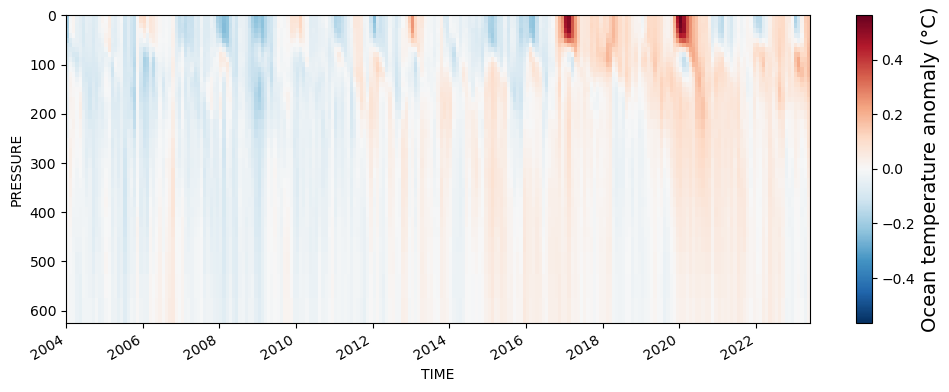

In [24]:
plt.figure(figsize=(12,4))
im = argo_anom_time_series.sel(PRESSURE=slice(0,600)).plot(y='PRESSURE', yincrease=False, add_colorbar=False)
plt
CB = plt.colorbar(im)
CB.ax.set_ylabel('Ocean temperature anomaly (°C)', fontsize=14)
plt.savefig('RG-argo-ocean-temp-anom{0}{1}S.png'.format(lat_range[1], lat_range[0]), dpi=200, bbox_inches='tight')

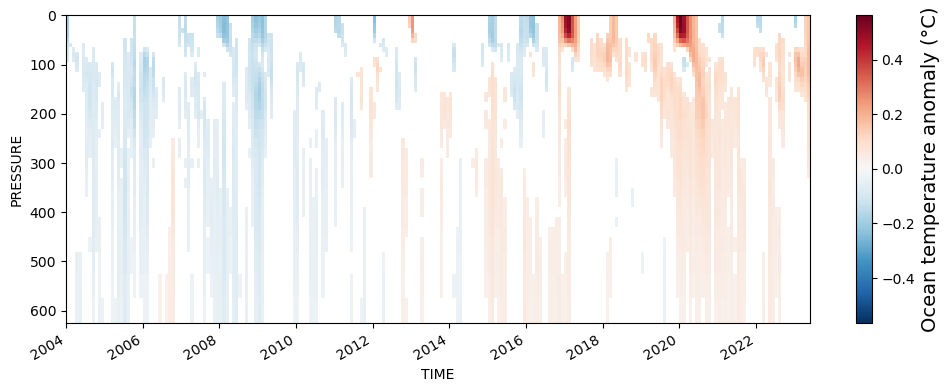

In [25]:
#mask out regions where the anomaly is less than 1*standard deviation at that depth

plt.figure(figsize=(12,4))
im = argo_anom_time_series.where(np.abs(argo_anom_time_series) > 1*argo_anom_time_series.std(dim='TIME')).sel(PRESSURE=slice(0,600)).plot(y='PRESSURE', yincrease=False, add_colorbar=False)
plt
CB = plt.colorbar(im)
CB.ax.set_ylabel('Ocean temperature anomaly (°C)', fontsize=14)
plt.savefig('RG-argo-ocean-temp-anom{0}{1}S-masked-1sigma.png'.format(lat_range[1], lat_range[0]), dpi=200, bbox_inches='tight')

We are throwing away the temporal information in the data. Even so, the  signal we see is cold at the beginning, and warm at the end. 
What's the temperature trend? Let's use ordinary least squares regression.

In [26]:
from scipy.stats import linregress

In [27]:
# linear regression at every depth level
slopes = []
std_err = []
intercepts = []
r_values = []
p_values = []

for i in range (len(argo_anom_time_series.PRESSURE)):
    ols = linregress(np.arange(len(argo_anom_time_series.TIME)),
                     argo_anom_time_series.isel(PRESSURE=i))
    slopes.append(ols.slope)
    std_err.append(ols.stderr)
    intercepts.append(ols.intercept)
    r_values.append(ols.rvalue)
    p_values.append(ols.pvalue)

In [28]:
ols

LinregressResult(slope=4.399588125238138e-05, intercept=-0.005251564563869708, rvalue=0.3222955741120612, pvalue=4.956722796330067e-07, stderr=8.502294085590565e-06, intercept_stderr=0.0011400685526876321)

In [29]:
#convert slope from degrees per month to degrees per decade
slopes = np.asarray(slopes)*120
std_err = np.asarray(std_err)*120
intercepts = np.asarray(intercepts)
r_values = np.asarray(r_values)
p_values = np.asarray(p_values)


In [30]:
argo_ols = xr.Dataset(data_vars={'slope':('PRESSURE', slopes),
                                 'std_err':('PRESSURE', std_err),
                                 'intercept':('PRESSURE', intercepts),
                                 'r_value':('PRESSURE', r_values),
                                 'p_value':('PRESSURE', p_values)},
                        coords={'PRESSURE':argo_anom_time_series.PRESSURE})

In [31]:
argo_ols

<xarray.Dataset>
Dimensions:    (PRESSURE: 58)
Coordinates:
  * PRESSURE   (PRESSURE) float32 2.5 10.0 20.0 ... 1.8e+03 1.9e+03 1.975e+03
Data variables:
    slope      (PRESSURE) float64 0.08031 0.08012 0.08107 ... 0.005669 0.00528
    std_err    (PRESSURE) float64 0.01425 0.01412 0.01386 ... 0.0009492 0.00102
    intercept  (PRESSURE) float64 -0.08397 -0.08375 ... -0.005728 -0.005252
    r_value    (PRESSURE) float64 0.3477 0.3497 0.3591 ... 0.458 0.3657 0.3223
    p_value    (PRESSURE) float64 5.039e-08 4.193e-08 ... 8.743e-09 4.957e-07

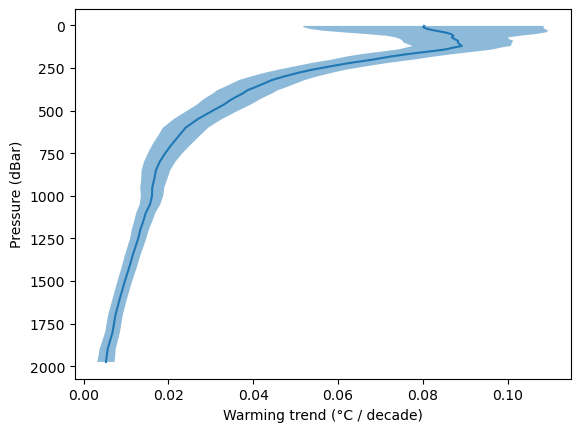

In [32]:
argo_ols['slope'].plot(y='PRESSURE', yincrease=False)
plt.fill_betweenx(argo_ols['PRESSURE'],
                  argo_ols['slope'] - 2*argo_ols['std_err'],
                  argo_ols['slope'] + 2*argo_ols['std_err'], alpha=0.5)

plt.ylabel('Pressure (dBar)')
plt.xlabel('Warming trend (°C / decade)')
plt.savefig('Argo_temperature_trends.png', dpi=200, bbox_inches='tight')

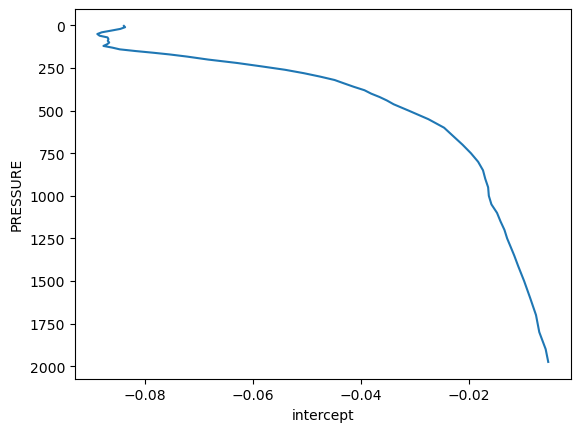

In [33]:
argo_ols['intercept'].plot(y='PRESSURE', yincrease=False)

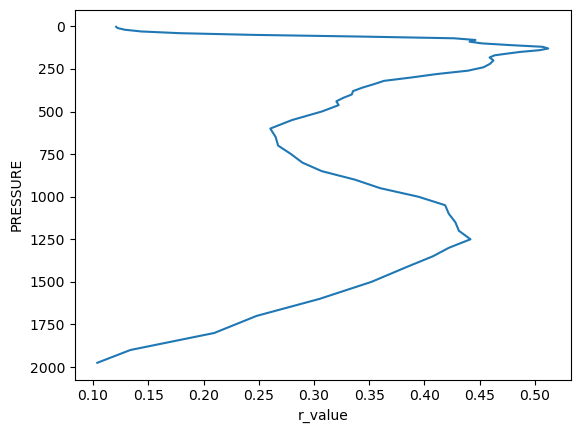

In [34]:
(argo_ols['r_value']**2).plot(y='PRESSURE', yincrease=False)

Text(0.5, 0, 'p-value')

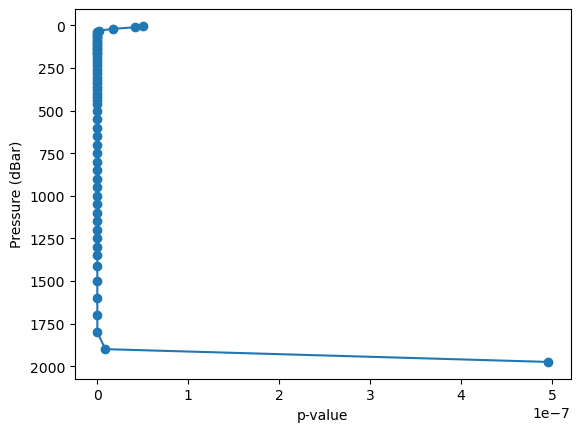

In [35]:
argo_ols['p_value'].sel(PRESSURE=slice(0,2000)).plot(y='PRESSURE', yincrease=False, marker='o')
# the relationship is statistically significant at every depth in the dataset.
plt.ylabel('Pressure (dBar)')
plt.xlabel('p-value')

## Spatial maps of decadal ocean temperature changes
Break points at:
- August 2007
- August 2016

In [36]:
pressure_range = (100, 200)
argo_depth_averaged_anom = argo_grid.average(
                                ds_RG_argo_anom['ARGO_TEMPERATURE_ANOMALY'].sel(PRESSURE=slice(pressure_range[0],
                                                                                               pressure_range[1])),
                                              'Z').load()

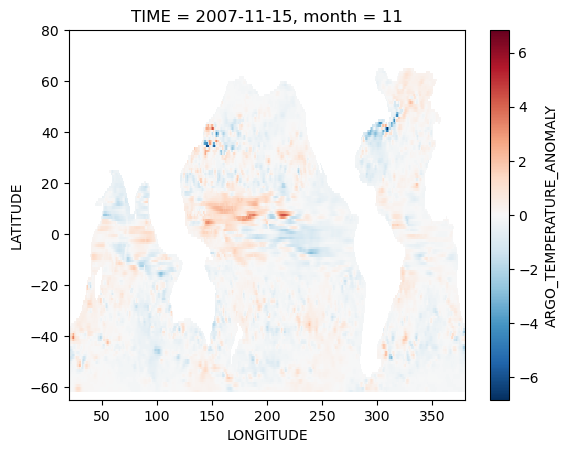

In [37]:
argo_depth_averaged_anom.sel(TIME='2007-11').plot()

In [38]:
beginning_argo_data = '2004-01-01'
end_period_1 = '2007-08-31'
end_period_2 = '2016-08-31'
end_period_3 = '2023-05-31' # end of available data

In [39]:
# time bins for main manuscript figure
argo_depth_averaged_anom_binned = argo_depth_averaged_anom.groupby_bins('TIME',
                                              [np.datetime64(beginning_argo_data),
                                               np.datetime64(end_period_1),
                                               np.datetime64(end_period_2),
                                               np.datetime64(end_period_3)],
                                                                labels=[np.datetime64(end_period_1),
                                                                        np.datetime64(end_period_2),
                                                                        np.datetime64(end_period_3)]).mean(dim='TIME')

In [40]:
argo_depth_averaged_anom_binned = argo_depth_averaged_anom_binned.assign_attrs({'Pressure range averaged over': '({0}, {1})'.format(pressure_range[0],
                                                                                                                pressure_range[1])})
argo_depth_averaged_anom_binned = argo_depth_averaged_anom_binned.assign_attrs({'Note': 'Monthly climatology subtracted from original monthly anomaly data. The data contain averaged temperature anomalies in the time periods shown.'})
argo_depth_averaged_anom_binned = argo_depth_averaged_anom_binned.assign_attrs({'TIME_bins': 'Shows the endpoint for each bin.'})

In [41]:
argo_depth_averaged_anom_binned.to_netcdf('argo_depth_averaged_anom_binned-{0}-{1}m.nc'.format(pressure_range[0], pressure_range[1]))

In [42]:
# time bins for response to reviewer figure
# Show that the ocean temp change leads the sea ice change point.
argo_depth_averaged_anom_binned_for_reviewer = argo_depth_averaged_anom.groupby_bins('TIME',
                                              [np.datetime64(beginning_argo_data),
                                               np.datetime64('2014-08-31'),
                                               np.datetime64('2016-08-31'),
                                               np.datetime64(end_period_3)],
                                                                labels=[np.datetime64('2014-08-31'),
                                                                        np.datetime64('2016-08-31'),
                                                                        np.datetime64(end_period_3)]).mean(dim='TIME')

argo_depth_averaged_anom_binned_for_reviewer = argo_depth_averaged_anom_binned_for_reviewer.assign_attrs({'Pressure range averaged over': '({0}, {1})'.format(pressure_range[0],
                                                                                                                pressure_range[1])})
argo_depth_averaged_anom_binned_for_reviewer = argo_depth_averaged_anom_binned_for_reviewer.assign_attrs({'Note': 'Monthly climatology subtracted from original monthly anomaly data. The data contain averaged temperature anomalies in the time periods shown.'})
argo_depth_averaged_anom_binned_for_reviewer = argo_depth_averaged_anom_binned_for_reviewer.assign_attrs({'TIME_bins': 'Shows the endpoint for each bin.'})

argo_depth_averaged_anom_binned_for_reviewer.to_netcdf('argo_depth_averaged_anom_binned_for_reviewer-{0}-{1}m.nc'.format(pressure_range[0], pressure_range[1]))

In [43]:
import cartopy
import cartopy.crs as ccrs

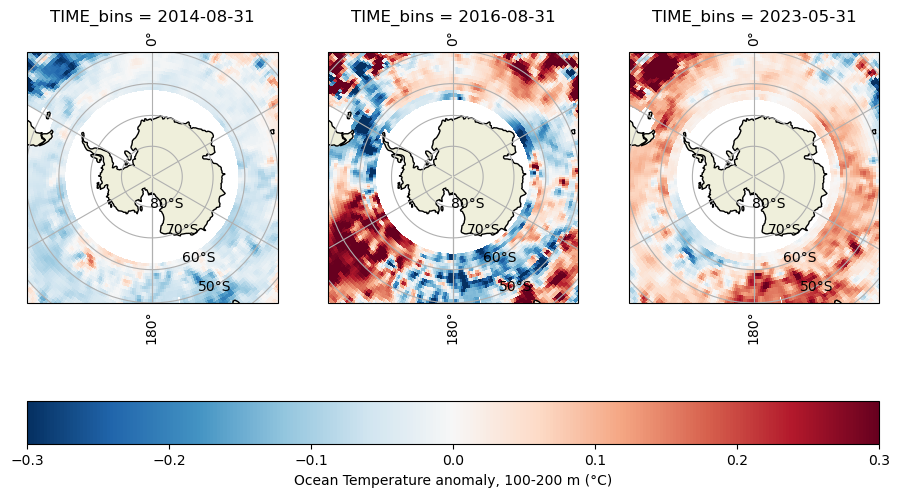

In [44]:
# plot of the ocean temperature anoms offset from the changepoint.
# three subpanels
fig, axs = plt.subplots(nrows=1,ncols=3,
                        subplot_kw={'projection': ccrs.SouthPolarStereo()},
                        figsize=(11,8.5))

for ax in axs:
    ax.coastlines(resolution='110m')
    ax.add_feature(cartopy.feature.LAND)
    ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
    ax.gridlines(draw_labels=True)
    
argo_depth_averaged_anom_binned_for_reviewer.isel(TIME_bins=0).plot(ax=axs[0], vmin=-0.3, vmax=0.3, 
                                            transform=ccrs.PlateCarree(), add_colorbar=False, cmap='RdBu_r')
argo_depth_averaged_anom_binned_for_reviewer.isel(TIME_bins=1).plot(ax=axs[1], vmin=-0.3, vmax=0.3, 
                                            transform=ccrs.PlateCarree(), add_colorbar=False, cmap='RdBu_r')
im = argo_depth_averaged_anom_binned_for_reviewer.isel(TIME_bins=2).plot(ax=axs[2], vmin=-0.3, vmax=0.3, 
                                            transform=ccrs.PlateCarree(), add_colorbar=False, cmap='RdBu_r')

CB = fig.colorbar(im, ax=axs, location='bottom')
CB.ax.set_xlabel('Ocean Temperature anomaly, 100-200 m (°C)')

plt.savefig('Ocean_temp_anomalies_using_reviewer_cutoffs_v3.png', dpi=180, bbox_inches='tight')

## Significance testing for spatial anomalies
t-tests should work to compare between the groups.

In [45]:
import scipy.stats

In [46]:
argo_pre_2007 = argo_depth_averaged_anom.sel(TIME=slice(beginning_argo_data, end_period_1))
argo_2007_2015 = argo_depth_averaged_anom.sel(TIME=slice(end_period_1, end_period_2))
argo_2015_2023 = argo_depth_averaged_anom.sel(TIME=slice(end_period_2, end_period_3))

In [47]:
ttest_pre2007_to_2007_2015 = scipy.stats.ttest_ind(argo_pre_2007, argo_2007_2015, equal_var=False)
ttest_pre2007_to_2015_2023 = scipy.stats.ttest_ind(argo_pre_2007, argo_2015_2023, equal_var=False)
ttest_2007_2015_to_2015_2023 = scipy.stats.ttest_ind(argo_2007_2015, argo_2015_2023, equal_var=False)

In [48]:
ttest_pre2007_to_2007_2015 = xr.Dataset({'pvalues':(['LATITUDE', 'LONGITUDE'], ttest_pre2007_to_2007_2015.pvalue),
                                         'statistic':(['LATITUDE', 'LONGITUDE'], ttest_pre2007_to_2007_2015.statistic)},
                                       coords={'LATITUDE':argo_depth_averaged_anom.LATITUDE,
                                               'LONGITUDE':argo_depth_averaged_anom.LONGITUDE})

ttest_pre2007_to_2015_2023 = xr.Dataset({'pvalues':(['LATITUDE', 'LONGITUDE'], ttest_pre2007_to_2015_2023.pvalue),
                                         'statistic':(['LATITUDE', 'LONGITUDE'], ttest_pre2007_to_2015_2023.statistic)},
                                       coords={'LATITUDE':argo_depth_averaged_anom.LATITUDE,
                                               'LONGITUDE':argo_depth_averaged_anom.LONGITUDE})

ttest_2007_2015_to_2015_2023 = xr.Dataset({'pvalues':(['LATITUDE', 'LONGITUDE'], ttest_2007_2015_to_2015_2023.pvalue),
                                         'statistic':(['LATITUDE', 'LONGITUDE'], ttest_2007_2015_to_2015_2023.statistic)},
                                       coords={'LATITUDE':argo_depth_averaged_anom.LATITUDE,
                                               'LONGITUDE':argo_depth_averaged_anom.LONGITUDE})



In [49]:
ttest_pre2007_to_2007_2015.to_netcdf('argo_temp_ttest_pre2007_to_2007_2015.nc')
ttest_pre2007_to_2015_2023.to_netcdf('argo_temp_ttest_pre2007_to_2015_2023.nc')
ttest_2007_2015_to_2015_2023.to_netcdf('argo_temp_ttest_2007_2015_to_2015_2023.nc')

Need to adjust the p-values with a Bonferoni correction (since we are performing multiple comparisons). We're only interested in the Southern Ocean, so restrict to latitude range of 65S to 50S. This means we have 15$\times$360 independent t-tests (independent being used somewhat loosely here).

In [50]:
# significance testing of the time periods suggested by reviewer


argo_pre_2013 = argo_depth_averaged_anom.sel(TIME=slice(beginning_argo_data, '2014-08-31'))
argo_2013_2015 = argo_depth_averaged_anom.sel(TIME=slice('2014-08-31', '2016-08-31'))
argo_2015_2023 = argo_depth_averaged_anom.sel(TIME=slice('2016-08-31', end_period_3))

ttest_pre2007_to_2013_2015 = scipy.stats.ttest_ind(argo_pre_2007, argo_2013_2015, equal_var=False)
ttest_pre2013_to_2013_2015 = scipy.stats.ttest_ind(argo_pre_2013, argo_2013_2015, equal_var=False)
ttest_pre2013_to_2015_2023 = scipy.stats.ttest_ind(argo_pre_2013, argo_2015_2023, equal_var=False)
ttest_2013_2015_to_2015_2023 = scipy.stats.ttest_ind(argo_2013_2015, argo_2015_2023, equal_var=False)

ttest_pre2007_to_2013_2015 = xr.Dataset({'pvalues':(['LATITUDE', 'LONGITUDE'], ttest_pre2007_to_2013_2015.pvalue),
                                         'statistic':(['LATITUDE', 'LONGITUDE'], ttest_pre2007_to_2013_2015.statistic)},
                                       coords={'LATITUDE':argo_depth_averaged_anom.LATITUDE,
                                               'LONGITUDE':argo_depth_averaged_anom.LONGITUDE})

ttest_pre2013_to_2013_2015 = xr.Dataset({'pvalues':(['LATITUDE', 'LONGITUDE'], ttest_pre2013_to_2013_2015.pvalue),
                                         'statistic':(['LATITUDE', 'LONGITUDE'], ttest_pre2013_to_2013_2015.statistic)},
                                       coords={'LATITUDE':argo_depth_averaged_anom.LATITUDE,
                                               'LONGITUDE':argo_depth_averaged_anom.LONGITUDE})

ttest_pre2013_to_2015_2023 = xr.Dataset({'pvalues':(['LATITUDE', 'LONGITUDE'], ttest_pre2013_to_2015_2023.pvalue),
                                         'statistic':(['LATITUDE', 'LONGITUDE'], ttest_pre2013_to_2015_2023.statistic)},
                                       coords={'LATITUDE':argo_depth_averaged_anom.LATITUDE,
                                               'LONGITUDE':argo_depth_averaged_anom.LONGITUDE})

ttest_2013_2015_to_2015_2023 = xr.Dataset({'pvalues':(['LATITUDE', 'LONGITUDE'], ttest_2013_2015_to_2015_2023.pvalue),
                                         'statistic':(['LATITUDE', 'LONGITUDE'], ttest_2013_2015_to_2015_2023.statistic)},
                                       coords={'LATITUDE':argo_depth_averaged_anom.LATITUDE,
                                               'LONGITUDE':argo_depth_averaged_anom.LONGITUDE})

ttest_pre2007_to_2013_2015.to_netcdf('argo_temp_ttest_pre2007_to_2013_2015.nc')
ttest_pre2013_to_2013_2015.to_netcdf('argo_temp_ttest_pre2013_to_2013_2015.nc')
ttest_pre2013_to_2015_2023.to_netcdf('argo_temp_ttest_pre2013_to_2015_2023.nc')
ttest_2013_2015_to_2015_2023.to_netcdf('argo_temp_ttest_2013_2015_to_2015_2023.nc')

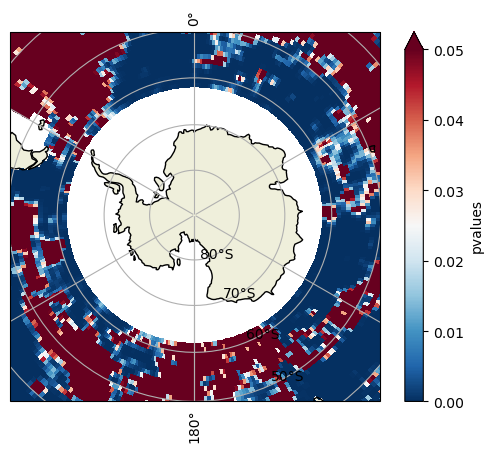

In [51]:

fig = plt.figure()
ax=plt.axes(projection=ccrs.SouthPolarStereo())

ax.coastlines(resolution='110m')
ax.add_feature(cartopy.feature.LAND)
ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
ax.gridlines(draw_labels=True)
    
ttest_pre2007_to_2007_2015['pvalues'].plot(ax=ax, vmin=0, vmax=0.05, 
                                            transform=ccrs.PlateCarree(), cmap='RdBu_r')


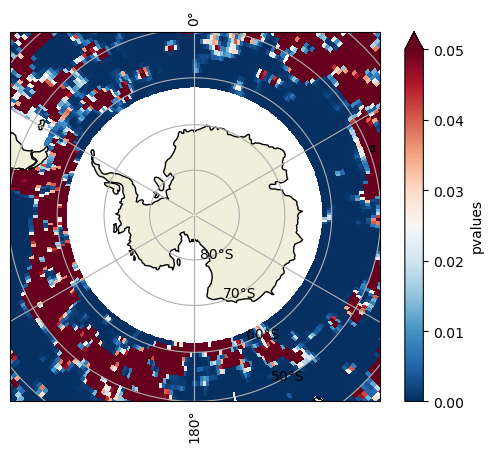

In [52]:

fig = plt.figure()
ax=plt.axes(projection=ccrs.SouthPolarStereo())

ax.coastlines(resolution='110m')
ax.add_feature(cartopy.feature.LAND)
ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
ax.gridlines(draw_labels=True)
    
ttest_pre2007_to_2015_2023['pvalues'].plot(ax=ax, vmin=0, vmax=0.05, 
                                            transform=ccrs.PlateCarree(), cmap='RdBu_r')


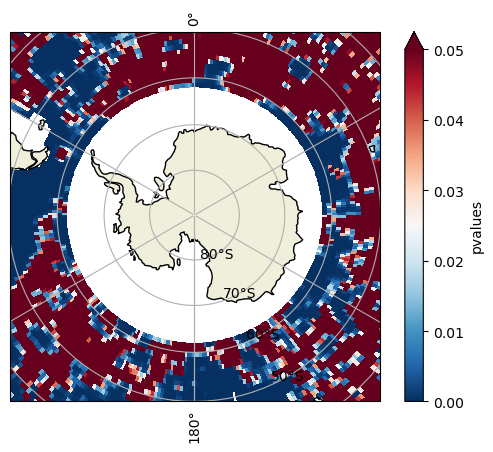

In [53]:

fig = plt.figure()
ax=plt.axes(projection=ccrs.SouthPolarStereo())

ax.coastlines(resolution='110m')
ax.add_feature(cartopy.feature.LAND)
ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
ax.gridlines(draw_labels=True)
    
ttest_2007_2015_to_2015_2023['pvalues'].plot(ax=ax, vmin=0, vmax=0.05, 
                                            transform=ccrs.PlateCarree(), cmap='RdBu_r')


## Ocean Temperature Hovmoller

In [54]:
def extract_and_plot_argo_data(pressure_range):
    '''
    Run this twice to get the two different pressure ranges of interest.
    '''
    lat_range = (-65, -50)

    argo_depth_averaged_anom = argo_grid.average(
                                    ds_RG_argo_anom['ARGO_TEMPERATURE_ANOMALY'].sel(PRESSURE=slice(pressure_range[0],
                                                                                                   pressure_range[1])),
                                                  'Z').load()

    argo_temp_anom_time_lon = argo_grid.average(argo_depth_averaged_anom.sel(LATITUDE=slice(lat_range[0], lat_range[1])), 'Y')
    argo_temp_anom_time_lon.to_netcdf('argo_temp_anom_{0}-{1}m_depth.nc'.format(
                                        pressure_range[0], pressure_range[1]))

    fig, ax = plt.subplot_mosaic([['A'],
                                  ['B']], sharex=True, height_ratios=[1, 0.4])

    im = argo_temp_anom_time_lon.plot(ax=ax['A'], x='TIME', add_colorbar=False)
    ax['A'].set_xlabel('')
    ax['A'].set_ylabel('Longitude')

    argo_grid.average(argo_anom_time_series.sel(PRESSURE=slice(pressure_range[0],pressure_range[1])),
                                                  'Z').load().plot(ax=ax['B'], )
    ax['B'].set_xlabel('Time')
    ax['B'].set_ylabel('Argo Temperature \n Anomaly (°C)')
    ax['B'].hlines(0, argo_temp_anom_time_lon.TIME[0], argo_temp_anom_time_lon.TIME[-1], color='k')


    CB = plt.colorbar(im, ax=[ax['A'], ax['B']])
    CB.ax.set_ylabel('Argo Temperature Anomaly (°C)')

    plt.savefig('argo_{0}-{1}m_temp_hov.png'.format(pressure_range[0], pressure_range[1]),
                bbox_inches='tight', dpi=200)

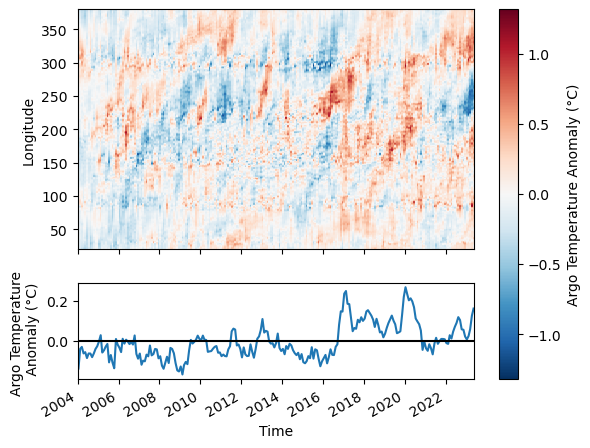

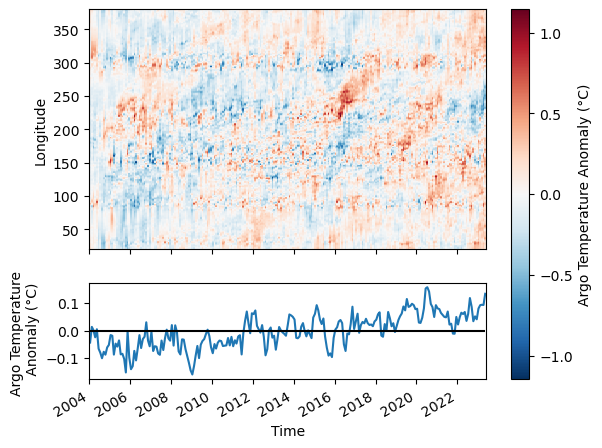

In [55]:
pressure_range = (0, 100)
extract_and_plot_argo_data(pressure_range)

pressure_range = (100, 200)
extract_and_plot_argo_data(pressure_range)


## Spatially averaged time plot

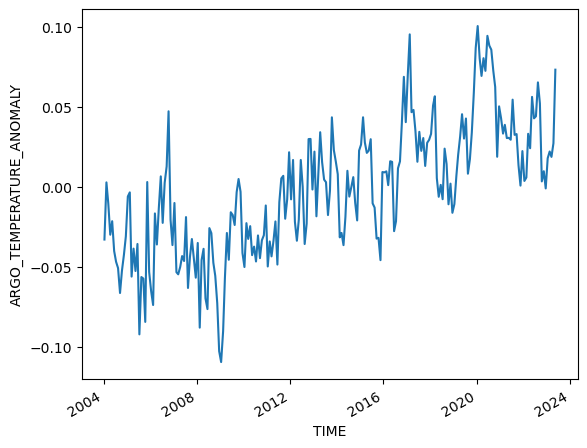

In [56]:
argo_grid.average(argo_anom_time_series.sel(PRESSURE=slice(0,600)), 'Z').plot()
plt.savefig('RG-argo-temp-anom-time-series-0-600m-depth.png', dpi=200, bbox_inches='tight')

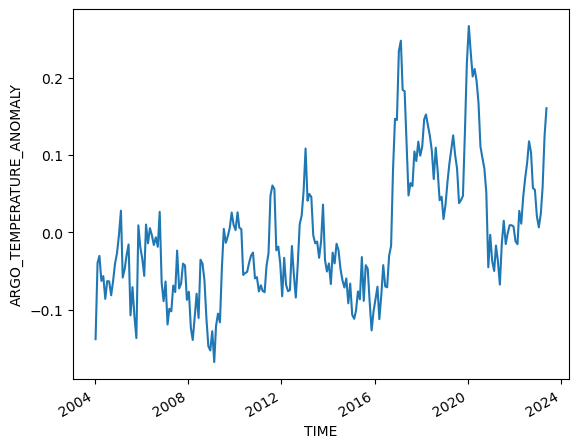

In [57]:
argo_grid.average(argo_anom_time_series.sel(PRESSURE=slice(0,100)), 'Z').plot()
plt.savefig('RG-argo-temp-anom-time-series-0-100m-depth.png', dpi=200, bbox_inches='tight')

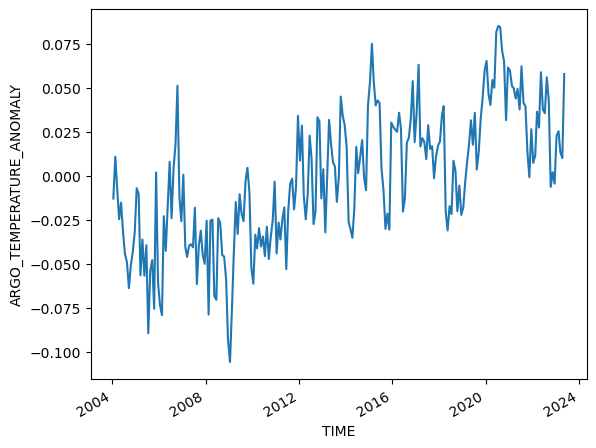

In [58]:
argo_grid.average(argo_anom_time_series.sel(PRESSURE=slice(100,600)), 'Z').plot()
plt.savefig('RG-argo-temp-anom-time-series-100-600m-depth.png', dpi=200, bbox_inches='tight')